## hw5: pca before classification -- some "insights"

### how to ensure class separation? there IS a simple way to simulate this (but not always recommended)

- the idea is that the eigenvectors of an invertible matrix is the same as the eigenvectors of its inverse

- Let $A$ be an invertible matrix and let $x$, $\lambda$  denote one set of eigenvalue and its associated eigenvector respectively. Then, we know that 

\begin{align*}
Ax = \lambda x \implies x  = \lambda A^{-1} x \implies \frac{1}{\lambda} x = A^{-1} x
\end{align*}

Thus, the eigenvalues get "inverted" but the eigenvectors remain the same! 

Next show that if $x_1$, $x_2$ are two eigenvectors of an invertible matrix, $A$, $x_1^\top A^{-1} x_2 = 0$. 
\begin{align*}
x_1^T A x_2 = x_1^T(A x_2) = x_1^T (\lambda_2 x_2) = \lambda_2 x_1^T x_2 = 0
\end{align*}

then show how the separation can be made large! 
\begin{align*}
(\mu_0  - \mu_1)^T \Sigma^{-1} (\mu_0 - \mu_1) = \mu_0^T \Sigma^{-1} \mu_0 + \mu_1^T \Sigma^{-1} \mu_1 - 2(\mu_0^T\Sigma^{-1}\mu_1) = \frac{1}{\lambda_{1}} + \frac{1}{\lambda_{2}}
\end{align*}


## verification through simulation

In [37]:
import numpy as np
import matplotlib.pyplot as plt 

#generate an invertible covariance matrix
n = 2
tmp1 = np.random.randn(n, n) #similar to the homework 5
evals = np.sqrt(np.diag((1, 1)))

sigma = tmp1 @ evals @ tmp1.T


#let mu0 and mu1 be the "scaled eigenvectors" of sigma
[u, s, v] = np.linalg.svd(sigma) #evd is same as svd for symmetric positive semi-def matrices
mu0 = 5 * u[:, 0]
mu1 = 5 * u[:, 1]

sep = (mu0.T - mu1.T) @ np.linalg.inv(sigma) @ (mu0 - mu1)


print(sep)

20.359363839475407


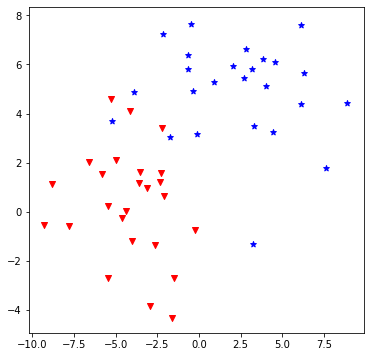

In [38]:
m = 50
phi = 0.5 #fraction of points in class 1

#generate class labels
bern_idx = np.random.rand(m, 1) #samples from unifrom random distribution (it is between 0,1)
y = 1 * (bern_idx >= phi) #this is a vector of size m, each entry is 0,1

#now generate X
X = np.zeros((m, n))
for ii in range(m):
    if (y[ii] == 0):
        xtmp = sigma @ np.random.randn(n, 1) + np.expand_dims(mu0, axis=1)
    else:
        xtmp = sigma @ np.random.randn(n,1) + np.expand_dims(mu1, axis=1)
        
    X[ii:ii + 1, :] = xtmp.T
    
    
X_zero = np.array([np.array(X[ii,:]) for ii in range(m) if y[ii] == 0])
X_one = np.array([np.array(X[ii,:]) for ii in range(m) if y[ii] == 1])

plt.figure(figsize=(6,6))
plt.scatter(X_zero[:,0], X_zero[:, 1], color='red', marker='v')
plt.scatter(X_one[:,0], X_one[:, 1], color='blue', marker='*')
plt.show()

## clustering

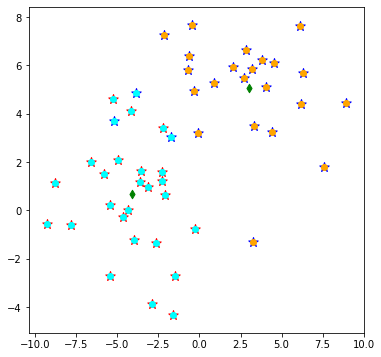

In [39]:
import sklearn

import scipy
from scipy.cluster.vq import kmeans2


##let us use the data from previous example!
num_clusters = 2
centroids, labels = kmeans2(X, num_clusters) #centroids are centers of each cluster that min sse , labels are "predictions"
Xhat_zero = X[labels == 0] #should actually be yhat
Xhat_one = X[labels == 1]

plt.figure(figsize=(6,6))

plt.scatter(X_zero[:,0], X_zero[:, 1], color='red', marker='*',s=100)
plt.scatter(X_one[:,0], X_one[:, 1], color='blue', marker='*', s=100)

plt.scatter(Xhat_zero[:,0], Xhat_zero[:, 1], color='orange', marker='o')
plt.scatter(Xhat_one[:,0], Xhat_one[:, 1], color='cyan', marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='d')
plt.show()

limitations of k means -- it only works for "convex" bodies. let us see an example

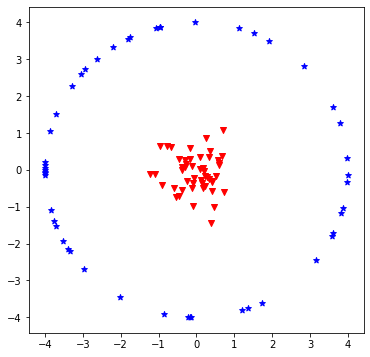

In [23]:
num0 = 50
num1 = 50

#one class just as done before
X_zero = .5* np.random.randn(num0, n)

#the other class done differently
radius = 4
angle = np.pi * np.random.uniform(0, 2, size = num1)
X_one = np.array([radius  * np.cos(angle), radius * np.sin(angle)])
X_one = X_one.T

X = np.vstack((X_zero, X_one))

plt.figure(figsize=(6,6))
plt.scatter(X_zero[:,0], X_zero[:, 1], color='red', marker='v')
plt.scatter(X_one[:,0], X_one[:, 1], color='blue', marker='*')
plt.show()

let us run k means on this

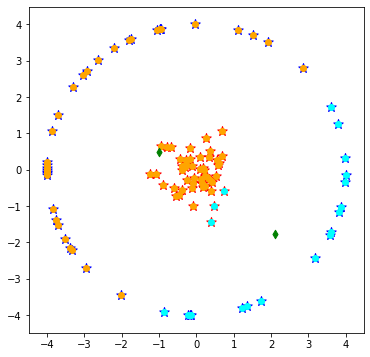

In [24]:
#remember that clustering is UNSUPERVISED -- so 
num_clusters = 2
centroids, labels = kmeans2(X, num_clusters)
Xhat_zero = X[labels == 0]
Xhat_one = X[labels == 1]

plt.figure(figsize=(6,6))

plt.scatter(X_zero[:,0], X_zero[:, 1], color='red', marker='*',s=100)
plt.scatter(X_one[:,0], X_one[:, 1], color='blue', marker='*', s=100)

plt.scatter(Xhat_zero[:,0], Xhat_zero[:, 1], color='orange', marker='o')
plt.scatter(Xhat_one[:,0], Xhat_one[:, 1], color='cyan', marker='o')


plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='d')
plt.show()

# methods such as spectral clustering that are generalizations of k means and can deal very well with "non-convex bodies"